In [1]:
#importing neccesory libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading dataset
df=pd.read_csv("/content/drive/MyDrive/GoogleGirlsScript/StockMarketPrediction/StockMarket.csv")

In [4]:
#top 5 rows
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [5]:
#last 5 rows
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0
1257,GOOG,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309,2513.93,2526.990,2498.2900,2524.92,1262309,0.0,1.0


In [6]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [7]:
# describtion about dataset -stastical summary
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [8]:
#cheking null values
df.isnull()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1254,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1255,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1256,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#filling the missing values
df.dropna()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [10]:
#converting the "date" columns into pandas dataframe
df['date']=pd.to_datetime(df['date'])

In [11]:
# Feature Selection
features = ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']
target = 'close'

In [12]:
# Normalize the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[features])

In [13]:
# Create the DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features)
scaled_df['date'] = df['date']
scaled_df['target'] = df[target]


In [14]:
# Creating lag features
# Lag features are commonly used in time series analysis and forecasting to incorporate past information into models. For example, when predicting stock prices,
#  weather patterns, or any sequential data, knowing the past values can help make better predictions for future values.
def create_lag_features(data, lag=1):
    for i in range(1, lag+1):
        data[f'lag_{i}'] = data['target'].shift(i)
    return data

In [15]:
lagged_df = create_lag_features(scaled_df, lag=5)
lagged_df = lagged_df.dropna()

In [16]:
lagged_df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,date,target,lag_1,lag_2,lag_3,lag_4,lag_5
5,0.014935,0.016429,0.015654,0.014779,0.190926,0.014935,0.016429,0.015654,0.014779,0.190926,2016-06-21 00:00:00+00:00,695.94,693.71,691.72,710.36,718.92,718.27
6,0.015755,0.015399,0.016239,0.015135,0.142922,0.015755,0.015399,0.016239,0.015135,0.142922,2016-06-22 00:00:00+00:00,697.46,695.94,693.71,691.72,710.36,718.92
7,0.018135,0.015986,0.012924,0.014267,0.311361,0.018135,0.015986,0.012924,0.014267,0.311361,2016-06-23 00:00:00+00:00,701.87,697.46,695.94,693.71,691.72,710.36
8,0.003755,0.009220,0.005540,0.002249,0.700013,0.003755,0.009220,0.005540,0.002249,0.700013,2016-06-24 00:00:00+00:00,675.22,701.87,697.46,695.94,693.71,691.72
9,0.000000,0.000000,0.000000,0.000000,0.391506,0.000000,0.000000,0.000000,0.000000,0.391506,2016-06-27 00:00:00+00:00,668.26,675.22,701.87,697.46,695.94,693.71


In [17]:
# Splitting into training, validation, and test sets
#size
train_size = int(len(lagged_df) * 0.7)
val_size = int(len(lagged_df) * 0.2)
test_size = len(lagged_df) - train_size - val_size
#spliting the data according to the size
train_data = lagged_df[:train_size]
val_data = lagged_df[train_size:train_size+val_size]
test_data = lagged_df[train_size+val_size:]


In [18]:
# Separate features and targets-for training validation and testing
X_train = train_data.drop(['date', 'target'], axis=1).values
y_train = train_data['target'].values

X_val = val_data.drop(['date', 'target'], axis=1).values
y_val = val_data['target'].values

X_test = test_data.drop(['date', 'target'], axis=1).values
y_test = test_data['target'].values

# ** Building the Neural Network Model**

In [19]:
#importing the neccesory libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [20]:
# Define the model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
#activation function-relu
# 3 Dropout layer
#reducing neurons for extrecting complex patterns-# 128->64->32->1

In [21]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
#using adam which is a optimizer
#using simple loss function-mean squere error=mean(target-actual)^2

In [22]:
# Define callbacks
#To stop training early if the model's performance on the validation set stops improving.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# To save the model weights to a file whenever the model's performance on the validation set improves.
model_checkpoint = ModelCheckpoint('best_model_mlp.h5', monitor='val_loss', save_best_only=True)

In [23]:
# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
28/28 [==============================] - 2s 24ms/step - loss: 582305.6250 - val_loss: 16909.3926
Epoch 2/100
 9/28 [========>.....................] - ETA: 0s - loss: 161554.1406

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 0s 13ms/step - loss: 123976.5391 - val_loss: 51818.3750
Epoch 3/100
28/28 [==============================] - 0s 10ms/step - loss: 76011.1328 - val_loss: 30984.5234
Epoch 4/100
28/28 [==============================] - 0s 7ms/step - loss: 71137.8750 - val_loss: 21272.6426
Epoch 5/100
28/28 [==============================] - 0s 9ms/step - loss: 62679.8125 - val_loss: 19785.7637
Epoch 6/100
28/28 [==============================] - 0s 10ms/step - loss: 57801.6328 - val_loss: 21095.5938
Epoch 7/100
28/28 [==============================] - 0s 7ms/step - loss: 49729.2227 - val_loss: 13034.4307
Epoch 8/100
28/28 [==============================] - 0s 8ms/step - loss: 53373.5195 - val_loss: 5316.7349
Epoch 9/100
28/28 [==============================] - 0s 6ms/step - loss: 54500.1367 - val_loss: 12948.5566
Epoch 10/100
28/28 [==============================] - 0s 9ms/step - loss: 46408.2969 - val_loss: 7919.0063
Epoch 11/100
28/28 [==========================

# **Model Evaluation**

In [24]:
# Load the best model
model.load_weights('best_model_mlp.h5')

In [25]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
val_loss = model.evaluate(X_val, y_val)
test_loss = model.evaluate(X_test, y_test)

print(f'Train Loss: {train_loss}')
print(f'Validation Loss: {val_loss}')
print(f'Test Loss: {test_loss}')


4/4 [==============================] - 0s 4ms/step - loss: 11397.6055
Train Loss: 2101.558349609375
Validation Loss: 5316.73486328125
Test Loss: 11397.60546875


In [26]:
# Make predictions
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

# Reshape predictions array
train_predictions = train_predictions.reshape(-1, 1)
val_predictions = val_predictions.reshape(-1, 1)
test_predictions = test_predictions.reshape(-1, 1)
print(train_predictions)
print(val_predictions)
print(test_predictions )

4/4 [==============================] - 0s 3ms/step
[[ 678.169  ]
 [ 675.3135 ]
 [ 673.8473 ]
 [ 670.2783 ]
 [ 665.7546 ]
 [ 660.0382 ]
 [ 656.29474]
 [ 659.2727 ]
 [ 656.7689 ]
 [ 658.9691 ]
 [ 664.61633]
 [ 667.2618 ]
 [ 668.7914 ]
 [ 673.4579 ]
 [ 675.91626]
 [ 682.307  ]
 [ 684.01117]
 [ 688.557  ]
 [ 691.2062 ]
 [ 696.7206 ]
 [ 699.00916]
 [ 704.81354]
 [ 705.58704]
 [ 711.1372 ]
 [ 711.7014 ]
 [ 712.7699 ]
 [ 711.9147 ]
 [ 714.46936]
 [ 720.5598 ]
 [ 726.7213 ]
 [ 733.1242 ]
 [ 735.64514]
 [ 742.14075]
 [ 746.00586]
 [ 747.23376]
 [ 750.63184]
 [ 750.78784]
 [ 754.546  ]
 [ 754.16614]
 [ 754.38354]
 [ 752.71466]
 [ 752.1426 ]
 [ 750.54834]
 [ 749.82043]
 [ 746.60364]
 [ 746.2148 ]
 [ 744.21216]
 [ 742.98096]
 [ 741.5308 ]
 [ 742.0819 ]
 [ 741.2108 ]
 [ 740.5657 ]
 [ 739.9787 ]
 [ 741.2591 ]
 [ 743.3969 ]
 [ 745.18097]
 [ 746.4208 ]
 [ 742.50635]
 [ 742.88525]
 [ 739.33374]
 [ 738.3611 ]
 [ 734.8292 ]
 [ 739.3018 ]
 [ 737.24286]
 [ 738.26697]
 [ 742.573  ]
 [ 746.4851 ]
 [ 748.7906

# **Fine-tuning and Advanced Optimization**

In [27]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
#  This callback dynamically adjusts the learning rate during training based on the validation loss, aiming to help the model converge faster and improve
# performance.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Fit the model with the learning rate scheduler
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])


Epoch 1/100
28/28 [==============================] - 0s 6ms/step - loss: 43797.1758 - val_loss: 9382.9824 - lr: 0.0010
Epoch 2/100
28/28 [==============================] - 0s 6ms/step - loss: 48014.4375 - val_loss: 2618.1838 - lr: 0.0010
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 51357.7617 - val_loss: 12753.0342 - lr: 0.0010
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 46909.6211 - val_loss: 23836.3652 - lr: 0.0010
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 44674.0117 - val_loss: 24789.7520 - lr: 0.0010
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 45189.3164 - val_loss: 20810.3301 - lr: 0.0010
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 41711.6367 - val_loss: 11186.6904 - lr: 0.0010
Epoch 8/100
28/28 [==============================] - 0s 4ms/step - loss: 43956.2734 - val_loss: 22764.6992 - lr: 2.0000e-04
Epoch 9/100
28/28 [===================

In [28]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
val_loss = model.evaluate(X_val, y_val)
test_loss = model.evaluate(X_test, y_test)

print(f'Train Loss: {train_loss}')
print(f'Validation Loss: {val_loss}')
print(f'Test Loss: {test_loss}')
#we can see the loss after appllying some advanced optimization decrease

4/4 [==============================] - 0s 4ms/step - loss: 5124.5391
Train Loss: 828.8065795898438
Validation Loss: 2618.183837890625
Test Loss: 5124.5390625


# **Visualization**

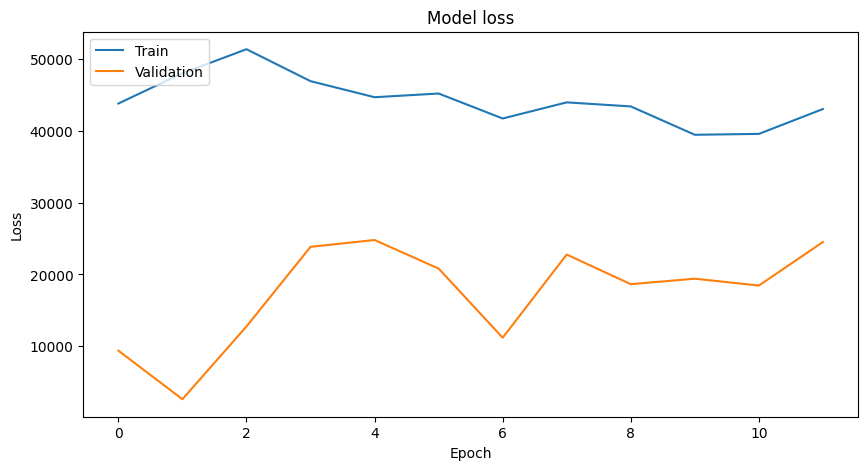

In [29]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


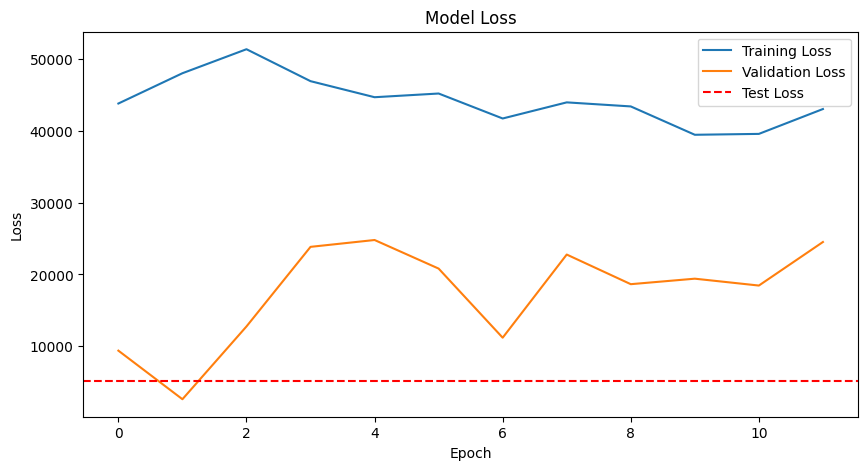

In [30]:
import matplotlib.pyplot as plt

# Plot training, validation, and testing loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
